In [1]:
from sympy import Symbol

from slimfit.fit import Fit
from slimfit.parameter import Parameters
from slimfit.models import Model

import numpy as np
import proplot as pplt

`slimfit` models are created using standard sympy syntax.

In [2]:
model = Model({Symbol("y"): Symbol("a") * Symbol("x") + Symbol("b")})

In [3]:
# Generate Ground-Truth data
gt = {"a": 0.5, "b": 2.5}

xdata = np.linspace(0, 11, num=100)
ydata = gt["a"] * xdata + gt["b"]

noise = np.random.normal(0, scale=ydata / 10.0 + 0.2)
ydata += noise

DATA = {"x": xdata, "y": ydata}

Create a parameter object from the model's symbols, specifying the subset of symbols to be fitted.

In [4]:
parameters = Parameters.from_symbols(model.symbols, "a b")

The `Fit` object takes the model, parameters and data. All symbols on the model's left-hand side
(dictionary values) must be given either as parameter or data.

In [8]:
fit = Fit(model, parameters=parameters, data=DATA)
result = fit.execute()
result.parameters

{'a': array(0.48249946), 'b': array(2.50307041)}

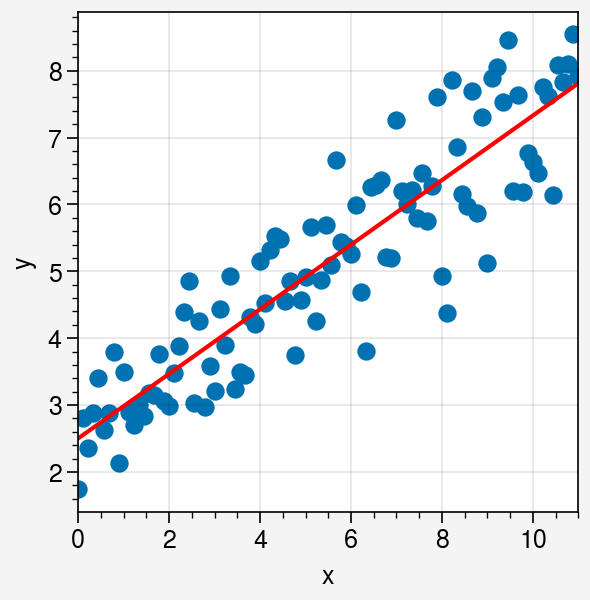

In [9]:
fig, ax = pplt.subplots()
ax.scatter(DATA["x"], DATA["y"])
ax.plot(DATA["x"], model(**result.parameters, **DATA)["y"], color="r")
ax.format(xlabel='x', ylabel='y')
pplt.show()